In [1]:
import numpy as np
import cv2

from skimage.measure import compare_ssim
import argparse
import imutils

from matplotlib import pyplot as plt

In [2]:
img1 = cv2.imread("Spot_the_Difference_I.jpg")
img2 = cv2.imread("Spot_the_Difference_II.jpg")

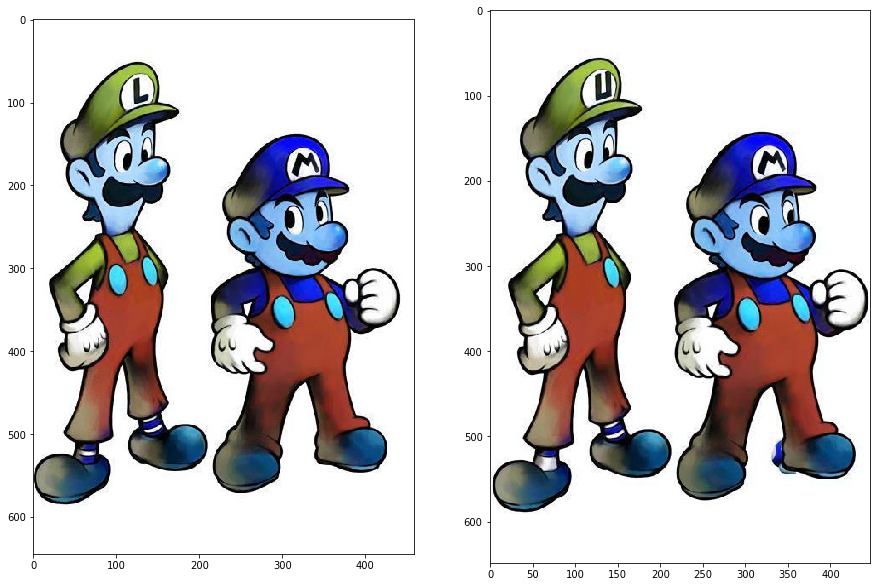

In [3]:
# show the image
fig, axs = plt.subplots(1,2, figsize=(15,15))

# show the output images
axs[0].imshow(img1)
axs[1].imshow(img2)

In [4]:
# Align both the images

# Convert images to grayscale
im1_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
 
sz = im1.shape

# Define the motion model
warp_mode = cv2.MOTION_TRANSLATION
 
# Define 2x3 or 3x3 matrices and initialize the matrix to identity
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    warp_matrix = np.eye(3, 3, dtype=np.float32)
else :
    warp_matrix = np.eye(2, 3, dtype=np.float32)
 
# Specify the number of iterations.
number_of_iterations = 5000;
 
# Specify the threshold of the increment
# in the correlation coefficient between two iterations
termination_eps = 1e-10;
 
# Define termination criteria
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)
 
# Run the ECC algorithm. The results are stored in warp_matrix.
(cc, warp_matrix) = cv2.findTransformECC(im1_gray,im2_gray,warp_matrix, warp_mode, criteria)
 
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    # Use warpPerspective for Homography 
    im2_aligned = cv2.warpPerspective (im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
else :
    # Use warpAffine for Translation, Euclidean and Affine
    im2_aligned = cv2.warpAffine(im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
 


In [5]:
# Read the images to be aligned
im1 = img1 #  cv2.imread("images/image1.jpg");
im2 = img2 #  cv2.imread("images/image2.jpg");
 
# Convert images to grayscale
im1_gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)

# Define the motion model
warp_mode = cv2.MOTION_TRANSLATION
 
# Define 2x3 or 3x3 matrices and initialize the matrix to identity
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    warp_matrix = np.eye(3, 3, dtype=np.float32)
else:
    warp_matrix = np.eye(2, 3, dtype=np.float32)
    

# specify the number of iterations.
number_of_iterations = 5000;
 
# Specify the threshold of the increment
# in the correlation coefficient between two iterations
termination_eps = 1e-10;
 
# Define termination criteria
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)
 
# Run the ECC algorithm. The results are stored in warp_matrix.
(cc, warp_matrix) = cv2.findTransformECC (im1_gray,im2_gray,warp_matrix, warp_mode, criteria)
 
if warp_mode == cv2.MOTION_HOMOGRAPHY :
    # Use warpPerspective for Homography 
    im2_aligned = cv2.warpPerspective (im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
else :
    # Use warpAffine for Translation, Euclidean and Affine
    im2_aligned = cv2.warpAffine(im2, warp_matrix, (sz[1],sz[0]), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
 

In [6]:
threshold = 200

diff= cv2.absdiff(img1, im2_aligned)
dst = cv2.fastNlMeansDenoisingColored(diff,None,57,10,7,21)
src_gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
canny_output = cv2.Canny(src_gray, threshold, threshold * 2)

_, contours, _ = cv2.findContours(canny_output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cv2.findContours(canny_output, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

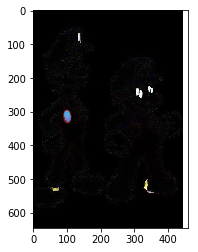

In [7]:
plt.imshow(diff)

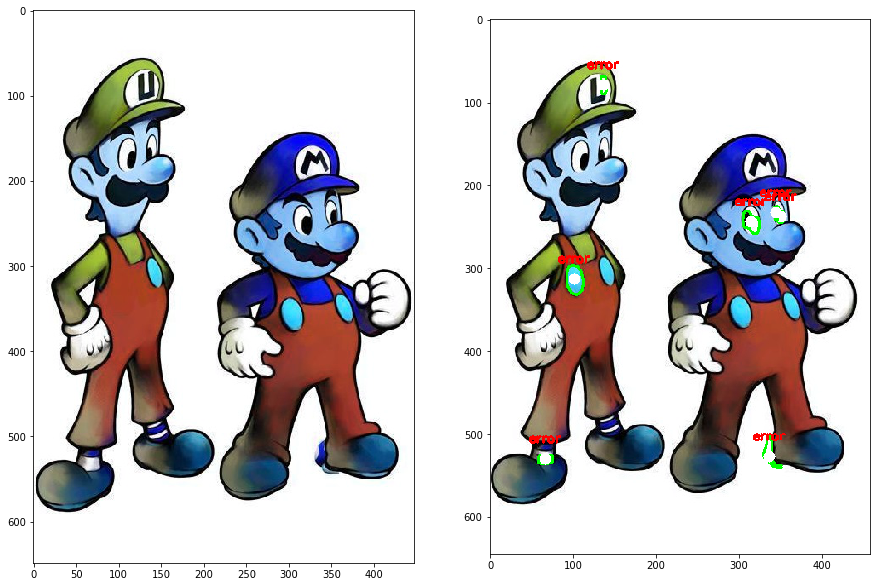

In [8]:
for c in cnts:
    # compute the center of the contour
    M = cv2.moments(c)
    
    if M["m00"] > 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    
        # draw the contour and center of the shape on the image
        cv2.drawContours(img1, [c], -1, (0, 255, 0), 2)
        cv2.circle(img1, (cX, cY), 7, (255, 255, 255), -1)
        cv2.putText(img1, "error", (cX - 20, cY - 20),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    

# show the image
fig, axs = plt.subplots(1,2, figsize=(15,15))

# show the output images
axs[0].imshow(img2)
axs[1].imshow(img1)